In [2]:
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Messinger
from Messinger import fem_velocidades  
import Messinger.Procesado_aerodinamico
from Messinger.Procesado_aerodinamico import Procesado_aerodinamico
from Messinger.Procesado_termico import procesado_termico,procesado_termico_rapido
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pywt
import tkinter as tk
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences
import scipy
from tkinter import filedialog
from tkinter import *
V_inf = int(70)
os.chdir('Messinger')
alpha=10
(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(70,10)
print(os.getcwd())
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.punto_remanso(Modelo)
print(Modelo_termico.x_remanso)
df = pd.DataFrame(data =[[2.54,3,12.4,20.4,30.3,40.3,49,60],['A8','A7','A6','A5','A4','A3','A2','A1']])
df=df.T
df.columns = ['s(mm)','sensor']
print(df)
MVD=40
T_remanso=-5
LWC=0.9
V=int(70)
x_experimental=[0,0.01,0.02]
T_experimental=[0,0.0,0.0]
angulo_ataque = 10
zona='intrados'
(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(70,angulo_ataque)
Superficie = Superficie[Superficie['y']>=0]
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)
x_superficie=np.array(Superficie['x'])
y_superficie = np.array(Superficie['y'])
s_perfil = [0]
for i in range(1,len(Modelo.x_superficie)):   
    delta_S= (Modelo.x_superficie[i]-Modelo.x_superficie[i-1])**2+(Modelo.y_superficie[i]-Modelo.y_superficie[i-1])**2
    s_perfil.append(np.sqrt(delta_S)+s_perfil[-1])
X=[] 
df['s(m)'] =df['s(mm)']*10**-3  
for s in df['s(m)']:    
    for i in range(1,len(s_perfil)):     
            if s>=s_perfil[i-1] and s<=s_perfil[i]:
                X.append(Modelo.x_superficie[i-1]+(Modelo.x_superficie[i]-Modelo.x_superficie[i-1])/(s_perfil[i]-s_perfil[i-1])*(s-s_perfil[i-1]))
                break
df['x(m)']=X
print(df)
X={}
for i in range(len(df['x(m)'])-1):
    n_sensor=int(df['sensor'].loc[i][-1])
    X.update({'FBG'+str(n_sensor):-df['x(m)'].loc[i+1]})
    n_sensor=int(df['sensor'].loc[i][-1])+8
    X.update({'FBG'+str(n_sensor):df['x(m)'].loc[i+1]})
print(X)
(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(V,angulo_ataque)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)
x_experimental = [0,0.01,0.02,0.03,0.04]
T_experimental = [-2.5, -3,-5.5,-5.5,0]

c:\Users\gonzalezvm\programa hielo\Messinger
-0.002003873387
  s(mm) sensor
0  2.54     A8
1     3     A7
2  12.4     A6
3  20.4     A5
4  30.3     A4
5  40.3     A3
6    49     A2
7    60     A1
  s(mm) sensor     s(m)      x(m)
0  2.54     A8  0.00254  0.000763
1     3     A7    0.003  0.001024
2  12.4     A6   0.0124  0.008875
3  20.4     A5   0.0204  0.016510
4  30.3     A4   0.0303  0.026211
5  40.3     A3   0.0403  0.036118
6    49     A2    0.049  0.044780
7    60     A1     0.06  0.055760
{'FBG8': -0.0010237160710708517, 'FBG16': 0.0010237160710708517, 'FBG7': -0.008875106836142116, 'FBG15': 0.008875106836142116, 'FBG6': -0.016510196715075517, 'FBG14': 0.016510196715075517, 'FBG5': -0.02621094848487953, 'FBG13': 0.02621094848487953, 'FBG4': -0.03611847338013922, 'FBG12': 0.03611847338013922, 'FBG3': -0.044780487828938204, 'FBG11': 0.044780487828938204, 'FBG2': -0.05576011471708383, 'FBG10': 0.05576011471708383}


0.06976348932


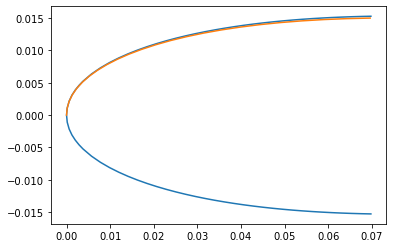

In [12]:
x_superficie = Modelo.x_superficie
y_superficie = Modelo.y_superficie
df = pd.read_csv('C://Users//gonzalezvm//programa hielo//NACA0012_coordinates.txt',sep=' ')
print(max(x_superficie))

df['x_real']=df.x*0.25
df['y_real']=df.y*0.25
df=df[df.x_real<max(x_superficie)]
plt.plot(x_superficie,y_superficie,df['x_real'],df['y_real'])